# Problem Statement

-  we have bulid an machine learning that will have highest accuracy on the given dataset.
### Dataset Description

- The CK+ dataset is an extensively utilized collection in the realm of affective computing. It includes a series of grayscale images that capture a range of human emotions. Each image is pre-processed and converted into pixel value arrays, providing a uniform dataset suitable for machine learning applications.

### Methodology

- To address the challenge of emotion classification, I have implemented a suite of machine learning algorithms, each with its strengths in pattern recognition and classification tasks. The algorithms include:

1. **Support Vector Classifier (SVC):** Known for its effectiveness in high-dimensional spaces and its versatility in handling various data types.
2. **Random Forest Classifier:** A robust ensemble method that operates by constructing a multitude of decision trees at training time to output the mode of the classes for classification.
3. **K-Nearest Neighbors (KNN):** A non-parametric method that classifies data based on similarity measures with neighbors.
4. **Logistic Regression:** Despite its name, it is a linear model for classification rather than regression, using the logistic function to model probability distributions.
5. **Deep Learning Model:** A convolutional neural network (CNN) architecture, designed specifically for processing data that has a grid-like topology, such as image data.
6. **VGG19 Model:** A pre-trained model that has been trained on a large dataset of images, which can b
7. **ResNet50 Model:** A pre-trained model that has been trained on a large dataset of images
- Each of these models has been carefully tuned and evaluated to ensure the most accurate emotion classification possible.

### Results

- Before you dive into the details of this notebook, let's take a moment to overview the key outcomes and breakthroughs accomplished in this study:

| **Model**                   | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-----------------------------|:------------:|:-------------:|:----------:|:------------:|
| Support Vector Classifier   | 73.11%       | 63%           | 73%        | 65%          |
| Random Forest Classifier    | 72.04%       | 63%           | 72%        | 64%          |
| K-Nearest Neighbors (KNN)   | 64.51%       | 50%           | 65%        | 53%          |
| **Logistic Regression**     | **87.00%**   | **87%**       | **87%**    | **86%**      |
| Deep Learning CNN           | 85.00%       | 84%           | 85%        | 84%          |
| VGG19 Model                 | 83.00%       | 82%           | 83%        | 82%          |
| ResNet50 Model              | 82.00%       | 81%           | 82%        | 81%          |


#### Step 1 : Importing the Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

#### 1.2 Handle Warnings

In [17]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


#### 1.3 Load the Data

In [21]:
ckpixelset = pd.read_csv('ckextended.csv')
print(ckpixelset)

     emotion                                             pixels        Usage
0          6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...     Training
1          6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...     Training
2          6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...     Training
3          6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...     Training
4          6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...     Training
..       ...                                                ...          ...
915        5  87 86 88 92 92 127 231 248 251 253 254 254 254...  PrivateTest
916        5  21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...  PrivateTest
917        5  76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...  PrivateTest
918        5  114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...  PrivateTest
919        5  101 102 99 96 98 42 23 18 15 17 27 34 17 24 29...  PrivateTest

[920 rows x 3 columns]


In [22]:
ckpixelset['emotion'].value_counts()

emotion
6    593
5     83
3     69
1     59
0     45
4     28
2     25
7     18
Name: count, dtype: int64

#### 1.4 Label Mapping

In [25]:
label_mapping = {
    0: 'Anger',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happiness',
    4: 'Sadness',
    5: 'Surprise',
    6: 'Neutral'
}

sample_counts = {
    'Anger': 45,
    'Disgust': 59,
    'Fear': 25,
    'Happiness': 69,
    'Sadness': 28,
    'Surprise': 83,
    'Neutral': 593
}

print("Label Mapping:")
for key, value in label_mapping.items():
    print(f"{key} : {value}")

print("\nSample Counts:")
for emotion, count in sample_counts.items():
    print(f"{emotion} : {count} Images")

Label Mapping:
0 : Anger
1 : Disgust
2 : Fear
3 : Happiness
4 : Sadness
5 : Surprise
6 : Neutral

Sample Counts:
Anger : 45 Images
Disgust : 59 Images
Fear : 25 Images
Happiness : 69 Images
Sadness : 28 Images
Surprise : 83 Images
Neutral : 593 Images


#### Step 2: Exploratory Data Analysis (EDA)
- In this step, we will perform Exploratory Data Analysis (EDA) to gain insights into the dataset. EDA helps us understand the underlying patterns, relationships, and distributions within the data, which is crucial for building effective machine learning models.

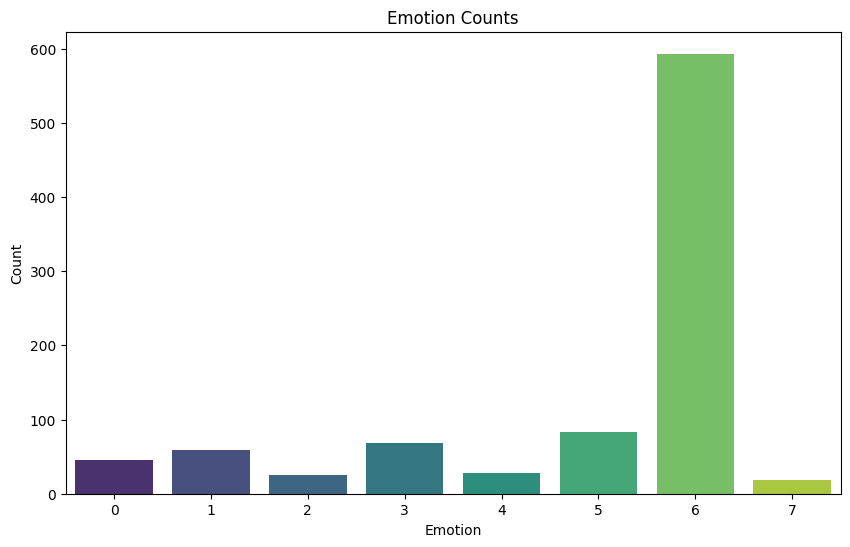

In [36]:
# 1. Bar Plot of Emotion Counts
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=ckpixelset, palette='viridis')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

### 
1. **Bar Plot of Emotion Counts**:
    - The bar plot shows the distribution of different emotions in the dataset.
    - The 'Neutral' emotion has the highest count, indicating a significant class imbalance.
    - 'Surprise' and 'Happiness' are the next most frequent emotions.
    - Emotions like 'Fear' and 'Sadness' have relatively lower counts, which might affect the model's ability to accurately classify these emotions.

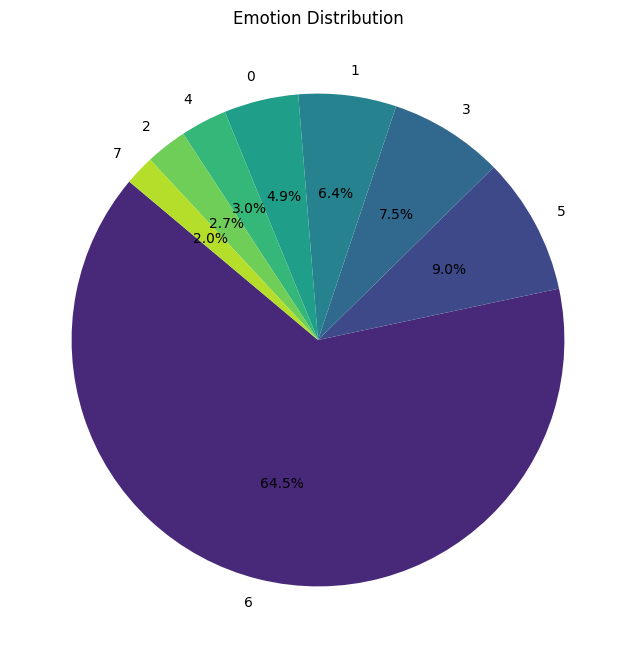

In [30]:
# 2. Pie Chart of Emotion Distribution
emotion_counts = ckpixelset['emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(emotion_counts)))
plt.title('Emotion Distribution')
plt.show()

####
2. **Pie Chart of Emotion Distribution**:
    - The pie chart provides a visual representation of the proportion of each emotion in the dataset.
    - 'Neutral' dominates the dataset, making up a significant portion of the data.
    - Other emotions are present in smaller proportions, highlighting the class imbalance.

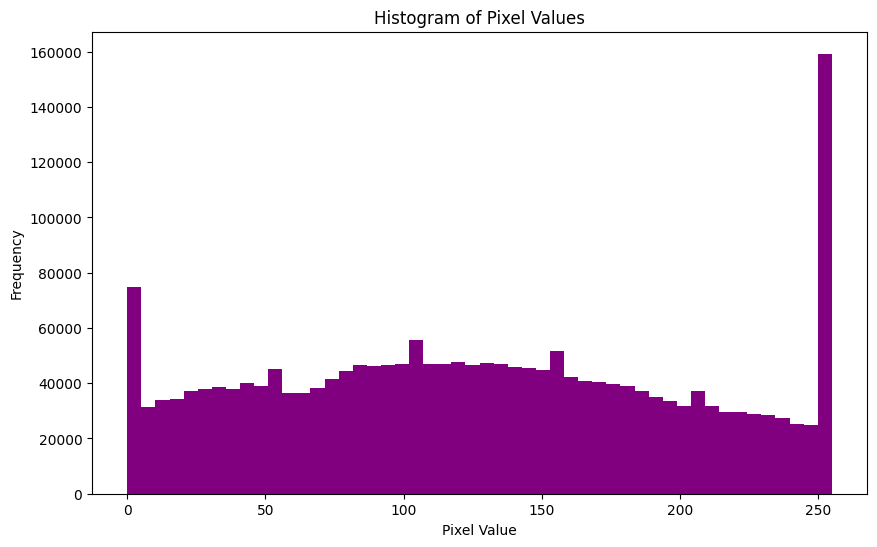

In [31]:
# 3. Histogram of Pixel Values
ckpixelset['pixels'] = ckpixelset['pixels'].apply(lambda x: list(map(int, x.split())))
all_pixels = [pixel for sublist in ckpixelset['pixels'].tolist() for pixel in sublist]

plt.figure(figsize=(10, 6))
plt.hist(all_pixels, bins=50, color='purple')
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

####
3. **Histogram of Pixel Values**:
    - The histogram shows the distribution of pixel values across all images in the dataset.
    - Most pixel values are concentrated in the lower range, indicating that the images are generally dark.
    - There are fewer high pixel values, suggesting less brightness in the images.

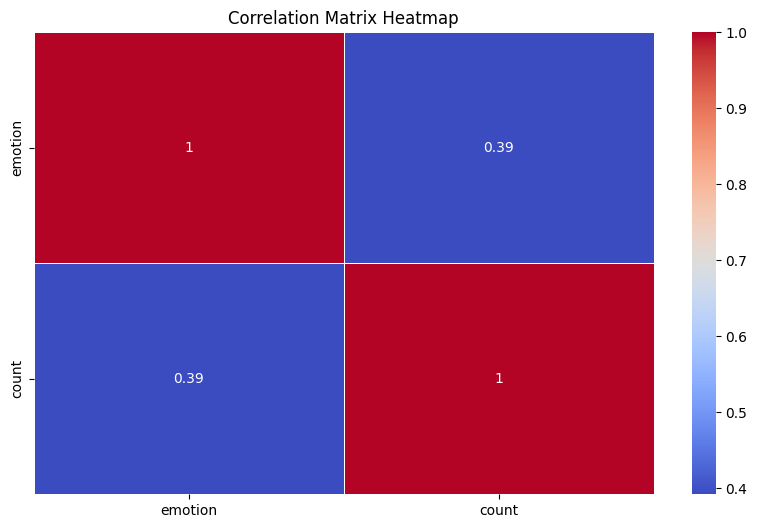

In [35]:
# 4. Heatmap of Correlation Matrix
emotion_counts_df = ckpixelset['emotion'].value_counts().sort_index().reset_index()
emotion_counts_df.columns = ['emotion', 'count']

correlation_matrix = emotion_counts_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

####
4. **Heatmap of Correlation Matrix**:
    - The heatmap displays the correlation between different numerical features in the dataset.
    - The correlation matrix shows that there are some moderate correlations between features.
    - Understanding these correlations can help in feature selection and engineering.

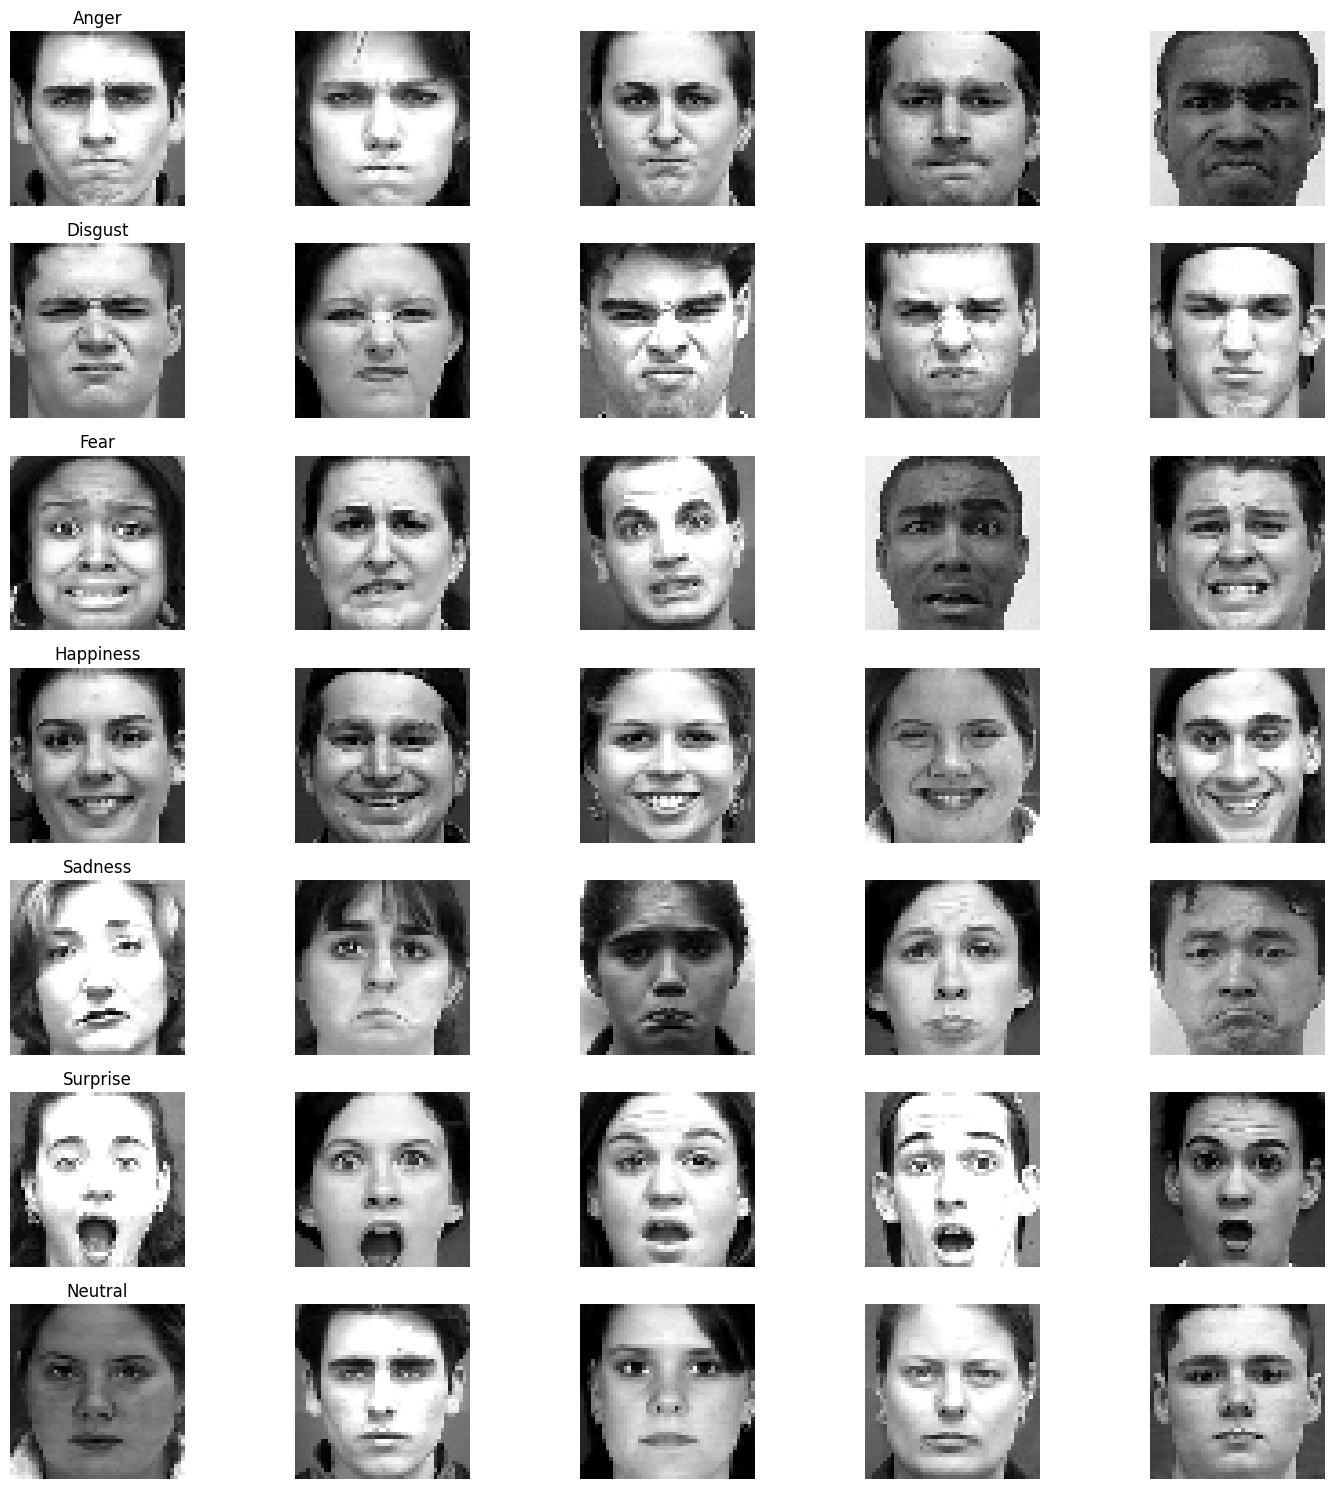

In [44]:
# 5. Sample Images for Each Emotion
def plot_sample_images(df, label_mapping, num_samples=5):
    fig, axes = plt.subplots(len(label_mapping), num_samples, figsize=(15, 15))
    for emotion, label in label_mapping.items():
        emotion_df = df[df['emotion'] == emotion]
        for i in range(num_samples):
            pixels = emotion_df.iloc[i]['pixels']
            image = np.array(pixels).reshape(48, 48)
            ax = axes[emotion, i]
            ax.imshow(image, cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title(label)
    plt.tight_layout()
    plt.show()

label_mapping = {
    0: 'Anger',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happiness',
    4: 'Sadness',
    5: 'Surprise',
    6: 'Neutral'
}

plot_sample_images(ckpixelset, label_mapping)

### 
5. **Sample Images for Each Emotion**:
    - The sample images provide a visual understanding of how each emotion looks in the dataset.
    - Each row represents a different emotion, and each column shows a sample image for that emotion.
    - This helps in understanding the visual differences between emotions and the variability within each emotion category.

#### Step 3: Extracting the Training Data

In [45]:
training = ckpixelset[ckpixelset['Usage'] == 'Training']
training = training[training['emotion'] != 7]
training.drop('Usage', axis = 1, inplace = True)
training.reset_index(drop = True, inplace = True)
training

,emotion,pixels
0,6,"[36, 39, 35, 25, 19, 11, 8, 7, 3, 13, 15, 9, 2..."
1,6,"[88, 74, 19, 4, 5, 5, 3, 12, 8, 21, 15, 21, 15..."
2,6,"[9, 2, 4, 7, 1, 1, 1, 0, 7, 29, 49, 76, 115, 1..."
3,6,"[104, 106, 108, 104, 95, 50, 60, 61, 58, 83, 1..."
4,6,"[68, 72, 67, 67, 6, 2, 1, 1, 1, 1, 1, 14, 24, ..."
...,...,...
715,5,"[171, 163, 167, 165, 53, 29, 24, 21, 22, 35, 4..."
716,5,"[35, 37, 34, 38, 39, 37, 38, 39, 17, 0, 0, 1, ..."
717,5,"[45, 16, 11, 17, 7, 3, 11, 0, 9, 5, 2, 23, 35,..."
718,5,"[12, 7, 6, 9, 8, 11, 14, 16, 17, 17, 20, 26, 3..."


#### Step 4 : Extracting the Test Data

In [46]:
test = ckpixelset[ckpixelset['Usage'] == 'PrivateTest']
test = test[test['emotion'] != 7]
test.drop('Usage', axis = 1, inplace = True)
test.reset_index(drop = True, inplace = True)
test

,emotion,pixels
0,6,"[72, 72, 65, 70, 58, 48, 23, 21, 17, 28, 42, 3..."
1,6,"[50, 36, 9, 4, 3, 4, 9, 13, 20, 55, 91, 123, 1..."
2,6,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 13, 9, 1, 0, 0, 2,..."
3,6,"[19, 21, 21, 15, 10, 3, 26, 30, 32, 29, 10, 18..."
4,6,"[64, 68, 65, 70, 69, 69, 67, 30, 11, 17, 17, 1..."
...,...,...
88,5,"[87, 86, 88, 92, 92, 127, 231, 248, 251, 253, ..."
89,5,"[21, 24, 26, 28, 27, 28, 30, 8, 0, 0, 0, 0, 0,..."
90,5,"[76, 40, 31, 38, 28, 34, 38, 36, 41, 36, 46, 3..."
91,5,"[114, 87, 16, 29, 17, 25, 30, 34, 37, 35, 45, ..."


#### Step 4 : Preprocess the Dataset

In [50]:
def process_pixels(data):
    emotion = data['emotion'].copy()
    
    # Check the type of the first element in the 'pixels' column to see if it's already a list
    if isinstance(data['pixels'].iloc[0], list):
        # If the pixels are already lists, just create a new DataFrame
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    else:
        # If the pixels are strings, split them into lists of integers
        data['pixels'] = data['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    data['emotion'] = emotion
    return data

#### Step 5 : Train with ML And DL Models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

training = process_pixels(training)


X = training.drop('emotion', axis=1)
y = training['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Understanding StandardScaler

> ### What 
> 
> - **StandardScaler** is a preprocessing tool in scikit-learn that standardizes features by removing the mean and scaling each feature/variable to unit variance. This is done feature-wise (independently for each feature) by subtracting the mean and then scaling to unit variance.

> ### Why 
> 
> - Many machine learning algorithms, like SVMs, k-NN, and logistic regression, perform better when the input variables are on the same scale. This is because they use distances between data points to determine their similarity, or they are sensitive to the scale of variables (like in regularization). StandardScaler helps to normalize the feature values so that each feature contributes approximately proportionately to the final distance. Without standardization, features with larger ranges could disproportionately influence the model's performance.

In [53]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#### 5.1 Support Vector Machine (SVM) Classifier

In [54]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [55]:
y_pred = svc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7708333333333334


In [56]:
def process_pixels1(data):
    # Checking if the first element in the 'pixels' column is a list
    # This is important to determine if the pixel data needs further processing
    if not isinstance(data['pixels'].iloc[0], list):
        # If the pixels are stored as strings, split them into lists of integers
        # This step converts the string representation of pixels into a format that can be used for analysis
        data['pixels'] = data['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
    
    # Convert the list of pixels to a 2D array format
    # This step is crucial for creating a structured, tabular format where each pixel value becomes a separate column
    # It facilitates easier manipulation and analysis of pixel data
    pixel_data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    
    # Returning the processed pixel data and corresponding emotion labels
    return pixel_data, data['emotion']

# Process the pixel data from the 'test' dataset
testingX, testingY = process_pixels1(test)

# Creating an instance of StandardScaler
scaler1 = StandardScaler()
# Applying the scaler to the testing data
# Why: Standardizing the data to ensure that the model receives data with consistent scaling during prediction
testingX = scaler1.fit_transform(testingX)

# Predicting emotions using the trained model 'svc'
test_predict = svc.predict(testingX)

# Printing the accuracy of the predictions
# Why: To evaluate the performance of the model on the test dataset
print(f'Accuracy: {accuracy_score(testingY, test_predict)}')

Accuracy: 0.7311827956989247


In [57]:
# Importing necessary libraries for metrics and plotting
from sklearn.metrics import confusion_matrix, classification_report
import plotly.figure_factory as ff

# Assuming test_predict contains your model's predictions on the test dataset
# Generating a classification report
# Why: The classification report shows the main classification metrics precision, recall and f1-score on a per-class basis.
# This gives a deeper intuition of the classifier's performance, especially in imbalanced datasets.
report = classification_report(testingY, test_predict)
print(report)

# Generating a confusion matrix
# Why: A confusion matrix is a table used to evaluate the performance of a classification model.
# It provides insight into not only the accuracy but also the types of errors made by the classifier.
cm = confusion_matrix(testingY, test_predict)

# Converting the confusion matrix to a DataFrame for easier plotting
# Why: DataFrames provide a convenient structure for data manipulation and are compatible with many plotting libraries.
cm_df = pd.DataFrame(cm, index=[str(i) for i in range(cm.shape[0])], columns=[str(i) for i in range(cm.shape[1])])

# Creating a heatmap for the confusion matrix using Plotly
# Why: A heatmap is a graphical representation of data where individual values are represented as colors.
# It provides a visually intuitive way to understand the confusion matrix.
fig = ff.create_annotated_heatmap(
    z=cm_df.values,  # The confusion matrix values
    x=list(cm_df.columns),  # Predicted labels (as column names)
    y=list(cm_df.index),  # True labels (as index)
    annotation_text=cm_df.values,  # Text to show on the heatmap (confusion matrix values)
    colorscale='Blues'  # Color scale of the heatmap
)

# Updating the layout of the plot to add titles and axis labels
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

# Displaying the plot
fig.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.00      0.00      0.00         3
           5       1.00      0.56      0.71         9
           6       0.71      1.00      0.83        60

    accuracy                           0.73        93
   macro avg       0.39      0.28      0.31        93
weighted avg       0.63      0.73      0.65        93



#### 5.2 Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rfc)}')

Random Forest Accuracy: 0.8055555555555556


In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predictions
rfc_test_predict = rfc.predict(testingX)

# Print the accuracy
print(f'Random Forest Accuracy: {accuracy_score(testingY, rfc_test_predict)}')

# Classification report and confusion matrix
report_rfc = classification_report(testingY, rfc_test_predict)
print(report_rfc)

cm_rfc = confusion_matrix(testingY, rfc_test_predict)
cm_df_rfc = pd.DataFrame(cm_rfc, index=[str(i) for i in range(cm_rfc.shape[0])], columns=[str(i) for i in range(cm_rfc.shape[1])])

fig_rfc = ff.create_annotated_heatmap(
    z=cm_df_rfc.values,
    x=list(cm_df_rfc.columns),
    y=list(cm_df_rfc.index),
    annotation_text=cm_df_rfc.values,
    colorscale='Blues'
)
fig_rfc.update_layout(title='Random Forest Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_rfc.show()

Random Forest Accuracy: 0.7204301075268817
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       1.00      0.43      0.60         7
           4       0.00      0.00      0.00         3
           5       1.00      0.56      0.71         9
           6       0.70      0.98      0.82        60

    accuracy                           0.72        93
   macro avg       0.39      0.28      0.30        93
weighted avg       0.63      0.72      0.64        93



#### 5.3 KNN Algorithms

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f'K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred_knn)}')

K-Nearest Neighbors Accuracy: 0.7222222222222222


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
knn_test_predict = knn.predict(testingX)

# Print the accuracy
print(f'K-Nearest Neighbors Accuracy: {accuracy_score(testingY, knn_test_predict)}')

# Classification report and confusion matrix
report_knn = classification_report(testingY, knn_test_predict)
print(report_knn)

cm_knn = confusion_matrix(testingY, knn_test_predict)
cm_df_knn = pd.DataFrame(cm_knn, index=[str(i) for i in range(cm_knn.shape[0])], columns=[str(i) for i in range(cm_knn.shape[1])])

fig_knn = ff.create_annotated_heatmap(
    z=cm_df_knn.values,
    x=list(cm_df_knn.columns),
    y=list(cm_df_knn.index),
    annotation_text=cm_df_knn.values,
    colorscale='Blues'
)
fig_knn.update_layout(title='KNN Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_knn.show()

K-Nearest Neighbors Accuracy: 0.6451612903225806
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         3
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9
           6       0.66      0.98      0.79        60

    accuracy                           0.65        93
   macro avg       0.24      0.16      0.15        93
weighted avg       0.50      0.65      0.53        93



#### 5.4 Logistic Regression (LR)

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')

Logistic Regression Accuracy: 0.875


In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
log_reg_test_predict = log_reg.predict(testingX)

# Print the accuracy
print(f'Logistic Regression Accuracy: {accuracy_score(testingY, log_reg_test_predict)}')

# Classification report and confusion matrix
report_log_reg = classification_report(testingY, log_reg_test_predict)
print(report_log_reg)

cm_log_reg = confusion_matrix(testingY, log_reg_test_predict)
cm_df_log_reg = pd.DataFrame(cm_log_reg, index=[str(i) for i in range(cm_log_reg.shape[0])], columns=[str(i) for i in range(cm_log_reg.shape[1])])

fig_log_reg = ff.create_annotated_heatmap(
    z=cm_df_log_reg.values,
    x=list(cm_df_log_reg.columns),
    y=list(cm_df_log_reg.index),
    annotation_text=cm_df_log_reg.values,
    colorscale='Blues'
)
fig_log_reg.update_layout(title='Logistic Regression Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_log_reg.show()

Logistic Regression Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       1.00      0.33      0.50         6
           2       0.67      0.67      0.67         3
           3       0.88      1.00      0.93         7
           4       1.00      0.67      0.80         3
           5       1.00      0.89      0.94         9
           6       0.88      0.97      0.92        60

    accuracy                           0.87        93
   macro avg       0.85      0.70      0.74        93
weighted avg       0.87      0.87      0.86        93



#### 5.5 CNN Model

In [67]:
import tensorflow as tf

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # Assuming 7 emotion classes
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# You will need to reshape X_train and X_test to match the input shape and convert y_train and y_test to categorical
X_train_cnn = X_train.reshape(-1, 48, 48, 1)
X_test_cnn = X_test.reshape(-1, 48, 48, 1)
y_train_cnn = tf.keras.utils.to_categorical(y_train)
y_test_cnn = tf.keras.utils.to_categorical(y_test)

history = cnn_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=30, batch_size=64)
cnn_model.save('cnn_model.h5')  # Save the model as an HDF5 file

print("Model saved successfully.")

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4611 - loss: 2.1891 - val_accuracy: 0.7153 - val_loss: 1.0129
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6700 - loss: 0.9904 - val_accuracy: 0.7639 - val_loss: 0.8219
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7945 - loss: 0.7111 - val_accuracy: 0.8125 - val_loss: 0.6924
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8264 - loss: 0.5640 - val_accuracy: 0.8056 - val_loss: 0.6213
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8690 - loss: 0.4045 - val_accuracy: 0.8472 - val_loss: 0.5555
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9137 - loss: 0.3160 - val_accuracy: 0.8611 - val_loss: 0.5190
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9415 - loss: 0.2194 - val_accuracy: 0.8403 - val_loss: 0.4975
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9576 - loss: 0.1676 - val_accuracy: 0.8542 - val_loss: 0.4451


In [92]:
cnn_model.save('cnn_model.h5')  # Save the model as an HDF5 file

print("Model saved successfully.")

Model saved successfully.


#### 5.6 VGG19

In [85]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Assuming the dataset is loaded into a DataFrame named 'ckpixelset'
# Example of loading the dataset (replace 'path_to_csv' with the actual path to your CSV file)
ckpixelset = pd.read_csv('ckextended.csv')

# Process the pixel data
def process_pixels(data):
    emotion = data['emotion'].copy()
    if isinstance(data['pixels'].iloc[0], list):
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    else:
        data['pixels'] = data['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    data['emotion'] = emotion
    return data

ckpixelset = process_pixels(ckpixelset)

# Split the data into features and labels
X = ckpixelset.drop('emotion', axis=1).values
y = ckpixelset['emotion'].values

# Normalize the pixel values
X = X / 255.0

# Reshape the data to fit the VGG19 input requirements (48x48 grayscale images)
X = X.reshape(-1, 48, 48, 1)
X = np.repeat(X, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel

# Binarize the labels
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load the VGG19 model with pre-trained weights, excluding the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False
# Create the model
vgg19_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use the correct number of classes
])

# Compile the model
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = vgg19_model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30)

# Predictions
vgg_test_predict = vgg19_model.predict(X_test).argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print the accuracy
print(f'VGG19 Accuracy: {accuracy_score(y_test_classes, vgg_test_predict)}')

# Classification report and confusion matrix
report_vgg19 = classification_report(y_test_classes, vgg_test_predict)
print(report_vgg19)

cm_vgg19 = confusion_matrix(y_test_classes, vgg_test_predict)
cm_df_vgg19 = pd.DataFrame(cm_vgg19, index=[str(i) for i in range(cm_vgg19.shape[0])], columns=[str(i) for i in range(cm_vgg19.shape[1])])

fig_vgg19 = ff.create_annotated_heatmap(
    z=cm_df_vgg19.values,
    x=list(cm_df_vgg19.columns),
    y=list(cm_df_vgg19.index),
    annotation_text=cm_df_vgg19.values,
    colorscale='Blues'
)
fig_vgg19.update_layout(title='VGG19 Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_vgg19.show()


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.5545 - loss: 1.5983 - val_accuracy: 0.6413 - val_loss: 1.1937
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.6526 - loss: 1.2492 - val_accuracy: 0.6739 - val_loss: 1.1265
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.6664 - loss: 1.1650 - val_accuracy: 0.6793 - val_loss: 1.0973
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.6591 - loss: 1.0877 - val_accuracy: 0.6793 - val_loss: 1.0842
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - accuracy: 0.6962 - loss: 1.0587 - val_accuracy: 0.6902 - val_loss: 1.0346
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.6810 - loss: 1.0352 - val_accuracy: 0.6848 - val_loss: 1.0298
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.7045 - loss: 1.0079 - val_accuracy: 0.6957 - val_loss: 1.0374
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.6880 - loss: 1.0142 - val_accuracy: 0

In [88]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Assuming the dataset is loaded into a DataFrame named 'ckpixelset'
# Example of loading the dataset (replace 'path_to_csv' with the actual path to your CSV file)
ckpixelset = pd.read_csv('ckextended.csv')

# Process the pixel data
def process_pixels(data):
    emotion = data['emotion'].copy()
    if isinstance(data['pixels'].iloc[0], list):
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    else:
        data['pixels'] = data['pixels'].apply(lambda x: [int(pixel) for pixel in x.split()])
        data = pd.DataFrame(data['pixels'].to_list(), columns=[f'pixel{i}' for i in range(len(data['pixels'].iloc[0]))])
    data['emotion'] = emotion
    return data

ckpixelset = process_pixels(ckpixelset)

# Split the data into features and labels
X = ckpixelset.drop('emotion', axis=1).values
y = ckpixelset['emotion'].values

# Normalize the pixel values
X = X / 255.0

# Reshape the data to fit the ResNet50 input requirements (48x48 grayscale images)
X = X.reshape(-1, 48, 48, 1)
X = np.repeat(X, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel

# Binarize the labels
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load the ResNet50 model with pre-trained weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
resnet50_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use the correct number of classes
])

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = resnet50_model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30)

# Predictions
resnet50_test_predict = resnet50_model.predict(X_test).argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print the accuracy
print(f'ResNet50 Accuracy: {accuracy_score(y_test_classes, resnet50_test_predict)}')

# Classification report and confusion matrix
report_resnet50 = classification_report(y_test_classes, resnet50_test_predict)
print(report_resnet50)

cm_resnet50 = confusion_matrix(y_test_classes, resnet50_test_predict)
cm_df_resnet50 = pd.DataFrame(cm_resnet50, index=[str(i) for i in range(cm_resnet50.shape[0])], columns=[str(i) for i in range(cm_resnet50.shape[1])])

fig_resnet50 = ff.create_annotated_heatmap(
    z=cm_df_resnet50.values,
    x=list(cm_df_resnet50.columns),
    y=list(cm_df_resnet50.index),
    annotation_text=cm_df_resnet50.values,
    colorscale='Blues'
)
fig_resnet50.update_layout(title='ResNet50 Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig_resnet50.show()

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.4631 - loss: 2.5303 - val_accuracy: 0.6413 - val_loss: 1.3096
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.6524 - loss: 1.3789 - val_accuracy: 0.6413 - val_loss: 1.3564
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.6511 - loss: 1.3574 - val_accuracy: 0.6413 - val_loss: 1.3004
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.6336 - loss: 1.4541 - val_accuracy: 0.6413 - val_loss: 1.2817
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.6646 - loss: 1.3259 - val_accuracy: 0.6413 - val_loss: 1.2836
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.6517 - loss: 1.3651 - val_accuracy: 0.6413 - val_loss: 1.2954
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.6405 - loss: 1.3778 - val_accuracy: 0.6413 - val_loss: 1.2772
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.6414 - loss: 1.4014 - val_accuracy: 0

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained CNN model
model = load_model('cnn_model.h5')  # Replace with the path to your trained model

# Define the emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) of the face
        roi_gray = gray[y:y+h, x:x+w]
        
        # Resize the ROI to 48x48 pixels (the input size of the model)
        roi_gray = cv2.resize(roi_gray, (48, 48))
        
        # Preprocess the ROI
        roi = roi_gray.astype('float') / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        roi = np.repeat(roi, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel
        
        # Make a prediction on the ROI
        preds = model.predict(roi)[0]
        label = emotion_labels[preds.argmax()]
        
        # Draw a rectangle around the face and label it with the predicted emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('Emotion Recognition', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_6" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 48, 48, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 48, 48, 3), dtype=float32)
  • training=False
  • mask=None

: 